Libraries that are going to be used in this project:
Pandas
seaborn
matplotlib


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Analysing California housing dataset which is available in Excel File.

In [8]:
# I have used read_excel method to read the file and head method to see only 5 record.
california=pd.read_excel('housing.xlsx')
california.head()
 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
# To analyze data info() method is used which helps to know datatype,no.observation & no.of features present in data.


In [6]:
california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


OBSERVATION 
- california is a DataFrame i.e 2dimensional
- Total 10 feature i.e column
- Total 20640 records i.e rows
- Geographical location is provided as Longitude and Latitude. 
- here longitude,latitude & median_income are continous data.
- total_bedroom is descrete data encoded as continous data
- Their are missing values in total_bedrooms
- housing_median_Age,total_rooms,population,households,median_house_value are discrete data. 
- ocean_proximity is nominal or categorical data.

In [7]:
# To explore categorical column unique method is used.
california["ocean_proximity"].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
# value_counts method is used to know labels and no. of records present in that label.
california["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
#to check if any null values present in dataset
california.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

1) What is the average median income of the data set and check the distribution 
   of data using appropriate plots. Please explain the distribution of the plot.?

In [14]:
# using median method I calculated average median income of dataset

avg_median_income=print("Average Median Income is",california["median_income"].median())
avg_median_income

Average Median Income is 3.5347999999999997


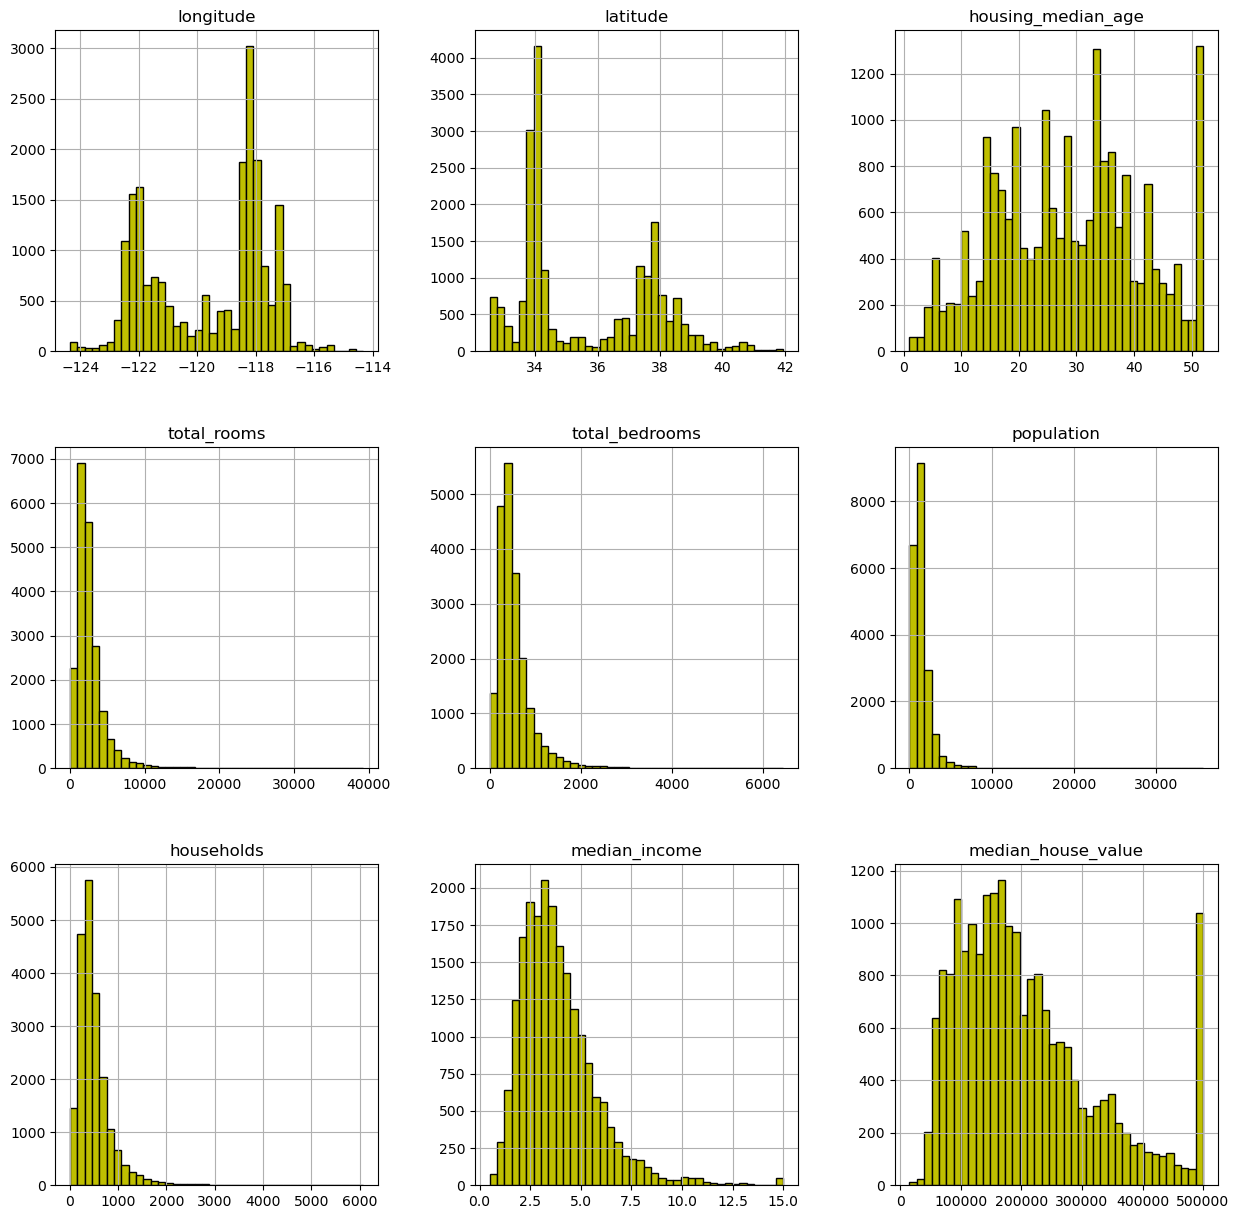

In [12]:
# histogram method has been used to check the distribution of different feature.
california.hist(figsize=(15, 15), bins=40,color="y", edgecolor="k")
plt.show()

Observations from Above plot:
- total_rooms,total_bedrooms,population,households,median_income are Rightly skewed data
- median_house_value and housing_median_age are symmetrical data
- longitude is negative skewed and latitude is positive skewed

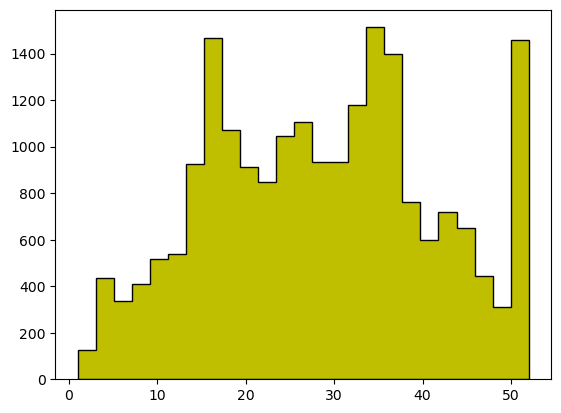

In [47]:
#2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

#figure and axis declaration
fig,ax=plt.subplots()
# x-axis value
x=california[["housing_median_age"]]
#function to pot
ax.hist(x,bins=25,histtype ="stepfilled",color='y',edgecolor="k")
# function to show
plt.show()


In [16]:
#Describe method is used to get the insights of dataset like here mean of housing_median_age
california["housing_median_age"].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [48]:
# to see skeweness of data
california["housing_median_age"].skew()

0.060330637599136865

OBSERVATION:
- housing_median_age data plot is symmetrical as its skewness is near to zero i.e normal distribution .

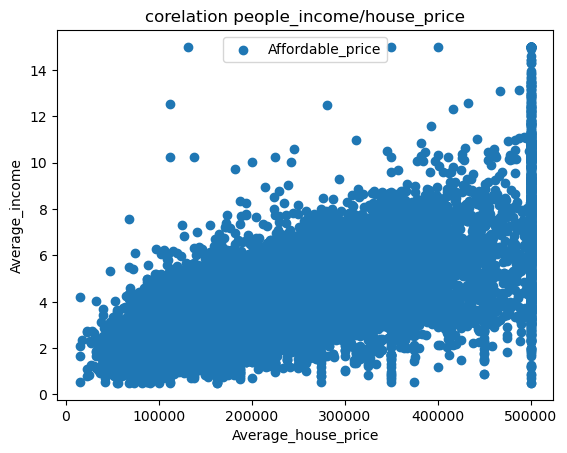

In [60]:
# 3) Show with the help of visualization, how median_income and median_house_values are related?

#x-axis value
x=california[["median_house_value"]]
#y-axis value
y=california[["median_income"]]
#figure and axis declaration
fig,ax=plt.subplots()
#function to plot
ax.scatter(x,y)
# function to name axis x&y
ax.set_xlabel("Average_house_price")
ax.set_ylabel("Average_income")
# function to give title
ax.set_title("corelation people_income/house_price")
# function add legend
ax.legend(["Affordable_price"])
#funtion to show plot
plt.show()


Observation from above plot:
- As Average income increases Average house value also increases
- Its a Positive corelation between the two variables.
- Here median_income is the dependent variable i.e on y-axis and median_house_value is the independent variable i.e on x-axis.

In [28]:
# 4) Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.

#first we will check how many total_bedrooms are not available.
california["total_bedrooms"].isna().sum()


207

In [46]:
# function to delete missing values
california_nmv=california.dropna() # created new dataset
california_nmv # printed dataset with no missing values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In above problem 207 rows were affected.

In [11]:
#5)Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.

#calculate mean
x=california[["total_bedrooms"]].mean()
print(x)
#function to replace with mean
california_mean=california.fillna(x)
california_mean.info()

total_bedrooms    537.870553
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


Their is No null value in above dataset as its filled with mean of total_bedrooms.

In [38]:
#6)Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.

def median_value(dataset,column):
  median=dataset[column].median()
  return median

User defined function is created median_value

In [45]:
median=median_value(california,"population")
print("median_value of population is",median )

median_value of population is 1166.0


In [ ]:
In the above example we used user defined function & calculated median value of population

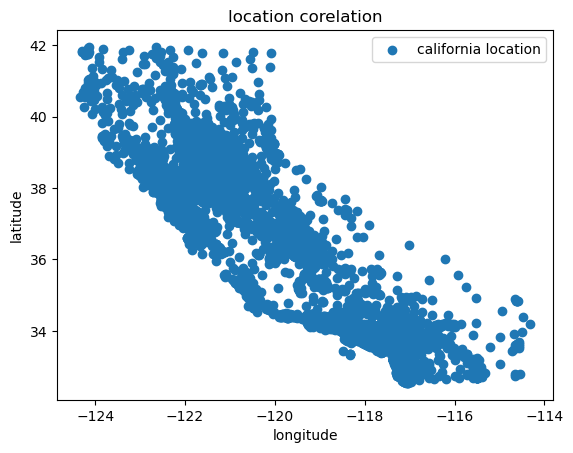

In [12]:
#7. Plot latitude versus longitude and explain your observations.

#x-axis value
x=california[["longitude"]]
#y-axis value
y=california[["latitude"]]
#figure and axis declaration
fig,ax=plt.subplots()
#function to plot
ax.scatter(x,y)
# function to name axis x&y
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
# function to give title
ax.set_title("location corelation")
# function add legend
ax.legend(["california location"])
#funtion to show plot
plt.show()

OBSERVATION:
- Above graph shows the geographical area of california housing dataset.
- latitude showing how far north or south the location is.
- longitude showing how east or west the location is.
- Both variables are not dependent on each other.


In [13]:
#8. Create a data set for which the ocean_proximity is ‘Near ocean’.

california_nearocean=california[california["ocean_proximity"]=="NEAR OCEAN"]
california_nearocean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


In [14]:
#9. Find the mean and median of the median income for the data set created in question 8

california_nearocean.agg({'median_income':['mean','median']})

,median_income
mean,4.005785
median,3.647050


10). Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less,
     should be quoted as small. If the total bedrooms is 11 or more but less than 1000,
     it should be medium, otherwise it should be considered large.

In [59]:
def total_bedroom_size(total_bedrooms):
    if total_bedrooms <=10:
        return "small"
    elif total_bedrooms <1000:
        return "medium"
    else:
        return "large"
    
california["total_bedroom_size"]=california["total_bedrooms"].apply(total_bedroom_size)
california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,medium
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,large
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,medium
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,medium
